# 지도 학습 - 머신러닝 모델

- `clf = 모델명(parameter)` (1. 모델 생성)
- `clf.fit(x_train, y_train)` (2. 모델 학습)
- `clf.score(x_test, y_test)` (3. 모델 성능 확인)
- `clf.predict(x_test)` (4. 예측 값 확인)
- ...

## 최근접이웃 (K-Nearest Neighbor)

- 순위를 사용하는 방법으로 가장 가까운 K개 이웃의 정보로 새로운 데이터를 예측하는 방법
    - 회귀 문제의 경우 종속 변수의 평균값으로 예측
    - 분류 문제의 경우 종속 변수의 과반 범주로 예측

- KNN은 거리 측정 방법에 따라 결과가 크게 달라짐
    - 거리를 계산하는 다양한 방법이 존재하며 일반적으로 유클리드 거리(Euclidean Distance)를 주로 사용

- KNN은 학습 데이터의 이상치 영향을 크게 받지 않으며 학습 데이터 수가 많다면 효과적인 알고리즘
    - 최근접 이웃(K)의 데이터만 사용하기 때문

- 데이터가 많은 경우 계산 시간이 오래 걸린다는 단점이 존재
    - 기준 데이터와 예측 데이터 사이의 거리를 전부 계산

### 최근접이웃 실습 (분류)

In [29]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier    # 분류 모델
from sklearn.neighbors import KNeighborsRegressor     # 회귀 모델 

In [30]:
# 분류 데이터 가져오기
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [31]:
# 컬럼별 데이터 개수 및 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [33]:
df['species'].astype('category').cat.codes  # 방법1 

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [34]:
from sklearn.preprocessing import LabelEncoder  # 방법2 
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [35]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
# 3. 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
Y # 범주형 > 분류 모델 사용

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [38]:
# 학습용과 평가용으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)  # 75:25의 비율로 나뉨.

In [39]:
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


In [40]:
# 모델 생성
model = KNeighborsClassifier(n_neighbors=5) # 최근접 이웃은 5로 설정

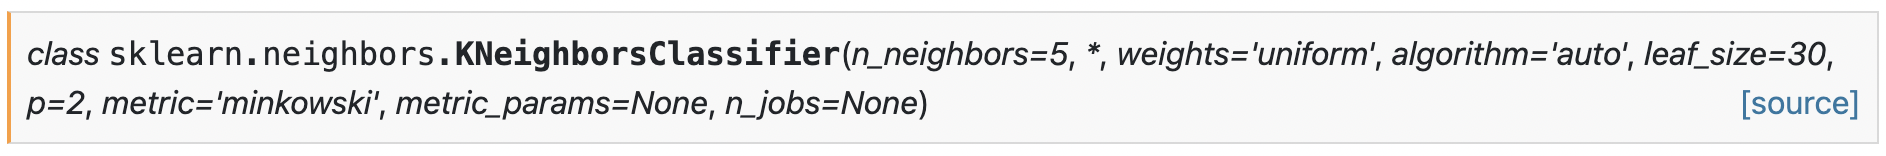

* metric: 거리를 잴 때 사용할 방법
* n_jobs: neighbors를 찾기 위해 실행 시키는 병렬 작업의 수. default가 -1로 모든 CPU를 사용해서 작업하겠다는 뜻.

In [41]:
# 모델 학습
model.fit(x_train, y_train) # 학습용 데이터만 사용

KNeighborsClassifier()

In [42]:
# 모델 평가
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.9732142857142857
평가 데이터 성능 : 0.9736842105263158


In [43]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [53]:
pd.Series(p_test).value_counts().sort_index()

0    13
1    15
2    10
Name: count, dtype: int64

In [46]:
# classification_report 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test, target_names=le.classes_))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### 최근접이웃 실습 (회귀)

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

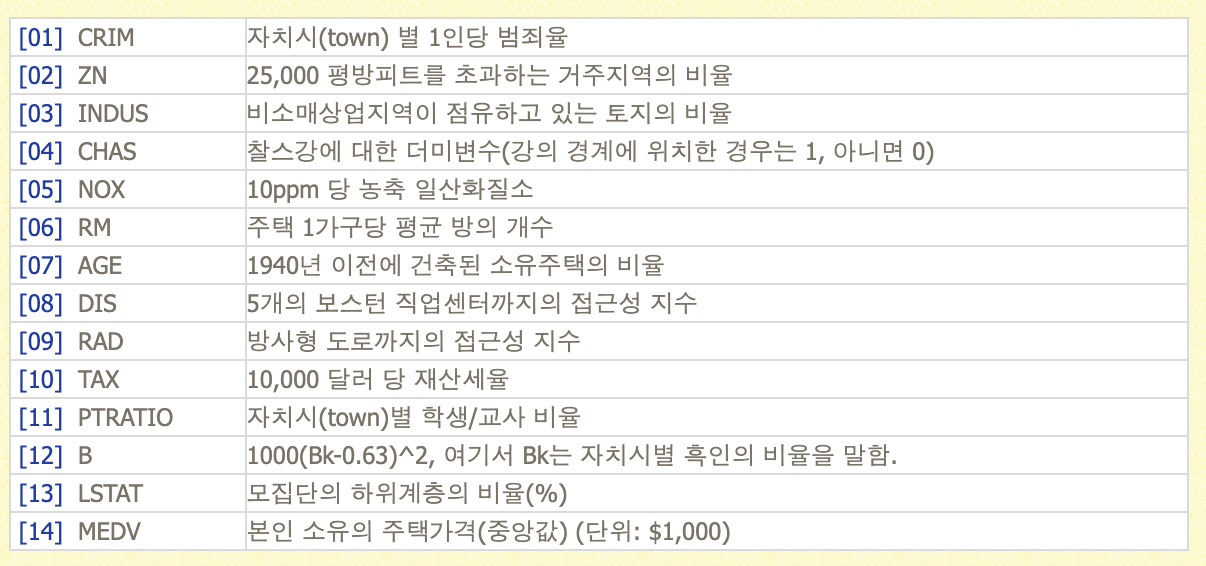

In [42]:
# 컬럼별 데이터 개수 및 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [43]:
# 3. 데이터 분할하기
X = df.drop(columns='medv')
Y = df['medv']
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [44]:
Y # 연속형 > 회귀 모델 사용 

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [45]:
# 학습용과 평가용으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [46]:
# 모델 생성
model = KNeighborsRegressor(n_neighbors=5) # 최근접 이웃은 5로 설정

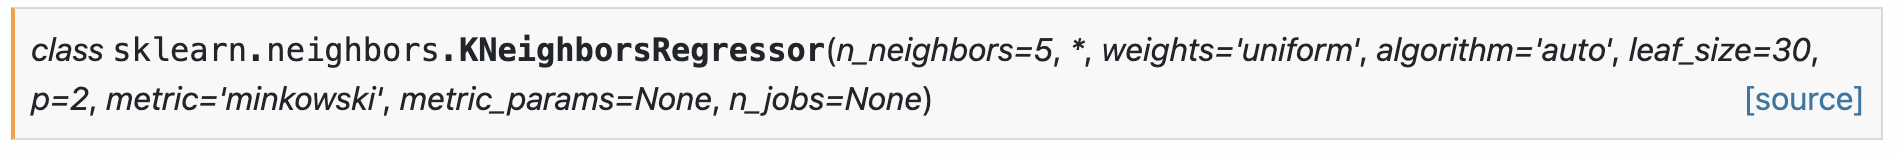

In [47]:
# 모델 학습
model.fit(x_train, y_train) # 학습용 데이터만 사용

KNeighborsRegressor()

In [48]:
# 모델 평가
print('학습 데이터 성능 :', model.score(x_train, y_train))  # 결정계수(R^2)
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.7066272660046313
평가 데이터 성능 : 0.4616380924610112


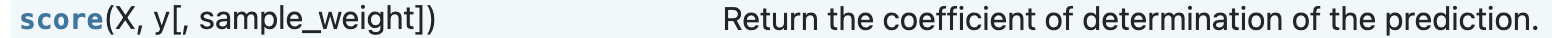

In [49]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([20.76, 29.54, 23.08, 11.94, 21.82, 21.4 , 22.96, 24.38, 30.24,
       18.26, 10.6 , 10.8 , 16.76, 10.38, 38.84, 25.34, 21.98, 23.44,
       24.32, 27.28, 23.56, 20.32, 19.02, 31.14, 21.16, 13.44, 18.48,
       22.46, 24.02, 17.4 , 16.04, 20.16, 19.68, 25.  , 24.6 , 19.04,
       10.38, 20.08, 13.44, 14.7 , 25.14, 21.16, 20.18, 19.04, 20.2 ,
       24.12, 23.26, 21.6 , 17.16, 20.04, 18.26, 22.3 , 28.14, 25.4 ,
       22.46, 22.46, 23.4 , 19.58, 10.  , 22.3 , 32.88, 20.72, 26.32,
       28.04, 22.52, 32.88, 19.04, 18.06, 13.9 , 29.34, 31.16, 21.82,
       24.72, 30.94, 22.52, 10.96, 32.1 , 22.84, 25.04, 20.46, 24.48,
       18.22, 16.38, 32.68, 28.02, 29.34, 23.8 , 12.7 , 32.24, 20.56,
       31.76, 13.44, 22.74, 25.02, 24.04, 22.62, 11.12, 25.06, 11.66,
       22.52, 29.42, 19.56, 26.5 , 28.04, 24.7 , 20.08, 12.02, 16.76,
       22.8 , 26.32, 32.24, 16.76, 18.06, 19.66, 16.86, 22.12, 10.96,
       17.86, 11.96, 41.6 , 32.88, 11.48, 28.06, 21.44, 22.1 , 19.04,
       29.42])

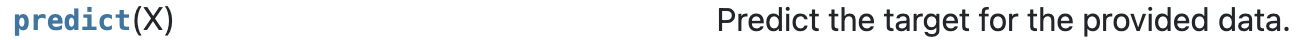

In [50]:
# rmse 계산
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, p_test, squared=False)

6.632016118442083

## 선형회귀분석 (Linear Regression)

### 최소제곱법
- 잔차(Residual, Error) 제곱의 합이 최소가 되도록 가중치(𝑊𝑒𝑖𝑔ℎ𝑡)와 편향(𝑏𝑖𝑎𝑠)을 찾음 
    - 잔차 : 예측 값과 실제 값의 차이

- 잔차 제곱의 합(Residual Sum of Squares)이 최소가 되는 가중치와 편향은 편미분을 통해 도출

- 장점
     - 간단하게 식을 유도할 수 있음
- 단점
     - 데이터가 많아지면 계산량이 매우 많이 증가
     - 데이터에 이상치가 있는 경우 성능 하락

In [27]:
# Numpy Array 형식의 데이터 세트를 생성 
# 공부시간(Hour, 특성)을 입력하면 시험 점수(Score, 레이블)를 예측
import numpy as np
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30, 40])

Text(0.5, 1.0, 'With Outlier')

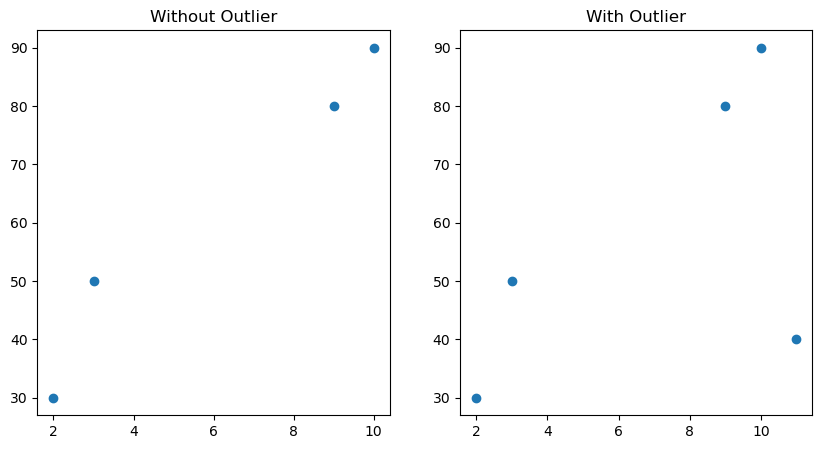

In [28]:
# Matplotlib를 이용하여 원본 데이터를 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')

In [29]:
# Ordinary Least Square 함수 구현
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

In [30]:
# w, b 계산
w1, b1 = OLS(x1, y1)
w1, b1

(6.6, 22.900000000000006)

In [31]:
# w, b 계산
w2, b2 = OLS(x2, y2)
w2, b2

(3.4285714285714284, 34.0)

In [32]:
# 값 예측
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2

Text(0.5, 1.0, 'With Outlier')

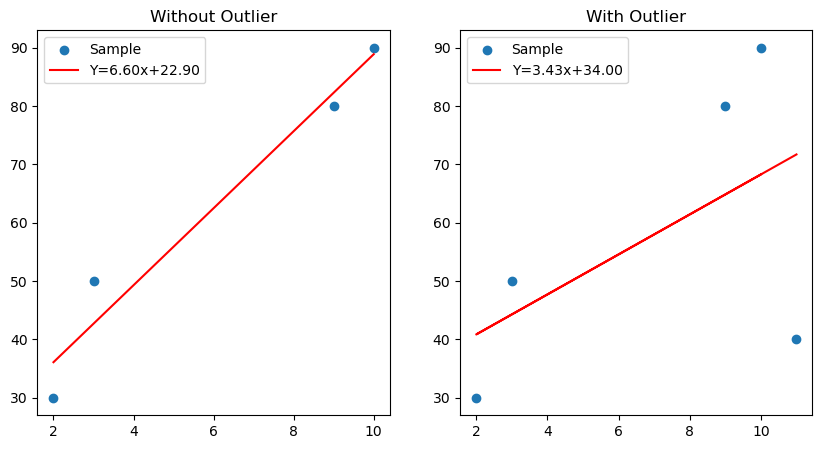

In [33]:
# 회귀선 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.legend()
plt.title('With Outlier')

In [36]:
# 최소 제곱법을 구현한 LinearRegression 클래스
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x1.reshape(-1, 1), y1)

LinearRegression()

In [37]:
model1.coef_  # 선형 회귀 문제에 대한 추정 계수(w)

array([6.6])

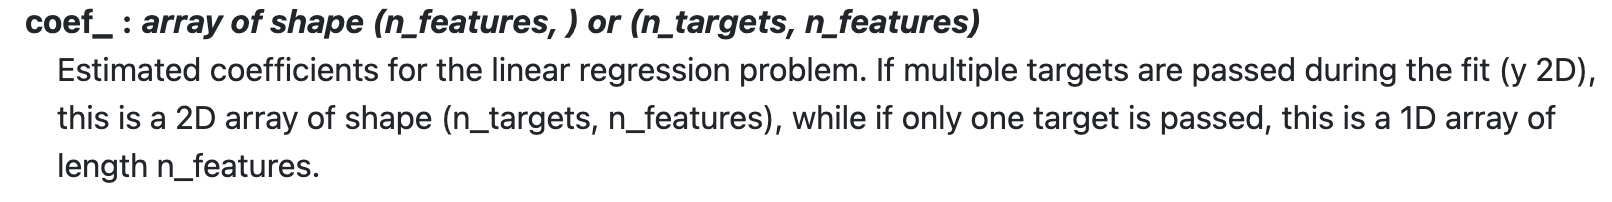

In [38]:
model1.intercept_  # 선형 모델의 독립항. 절편(b)

22.899999999999984

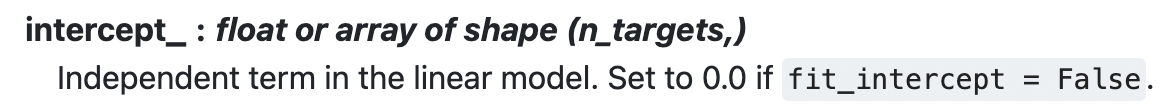

In [35]:
# 최소 제곱법을 구현한 LinearRegression 클래스
model2 = LinearRegression().fit(x2.reshape(-1, 1), y2)
model2.coef_, model2.intercept_

(array([3.42857143]), 34.0)

## 서포트 벡터 머신 

- 분류, 회귀, 이상치 탐지에 사용되는 지도학습 기반의 머신러닝 모델 
    - 복잡한 분류문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합

- 서포트 벡터 머신은 마진이 최대화되는 결정 경계를 찾음

- 마진은 클래스를 구분하는 초평면(결정 경계)과 이 초평면에 가장 가까운 훈련 샘플 사이의 거리로 정의

- 초평면에 가장 가까운 훈련 샘플을 서포트 벡터라고 함

- SVM은 특성의 스케일에 민감함
    - 표준화를 통해 스케일을 조정하면 결정 경계가 훨씬 좋아짐

In [28]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC    # 분류 모델
from sklearn.svm import SVR     # 회귀 모델 

In [29]:
# 데이터 가져오기
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
df['species'].astype('category').cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [31]:
df['species'] = df['species'].astype('category').cat.codes

In [32]:
# 데이터 분할하기
  # 시각화를 위해 특성은 2개만 사용 (petal length, petal width)
  # 범주가 Virginica 인지 아닌지 이진 분류로 변경
X = df.loc[:, ['petal_length', 'petal_width']]
Y = df.loc[:, 'species'] == 2
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [33]:
Y # 범주형 > 분류 모델 사용

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [37]:
# 학습용과 평가용으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [38]:
# SVM은 스케일에 민감 > 표준화 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [39]:
x_test = scaler.transform(x_test)

In [41]:
# 선형 SVM 모델 생성 및 학습
from sklearn.svm import LinearSVC
model = LinearSVC(C=1, random_state=42)  # C가 클 수록 과적합. (모든 샘플을 올바르게 분류하려고 함.)
model.fit(x_train, y_train)

/Users/yeongsun/anaconda3/envs/llm/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=1, random_state=42)

In [42]:
# 모델 평가
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.9553571428571429
평가 데이터 성능 : 0.9736842105263158


In [43]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([ True, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True])

In [44]:
# classification_report 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98        29
        True       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.95      0.98      0.96        38
weighted avg       0.98      0.97      0.97        38



## 의사 결정 나무
- 트리 구조를 이용하여 데이터 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내는 알고리즘
    - 스무고개와 유사
    - 의사결정나무는 분류(범주형 레이블)와 회귀(연속형 레이블)에 모두 사용 가능

- 각 변수의 영역을 재귀적으로 분할하면서 규칙을 생성 
    - if-else 형식으로 표현되는 규칙이 생성 

- 분류의 경우 특성의 영역을 분할하면서 정보 균일도(분류된 세트에 포함된 정보가 비슷한 정도)가 높게 하도록 분할
    - 정보 균일도 : 정보 균일도를 측정하는 방법은 엔트로피(Entropy)를 이용하는 방법과 Gini를 이용하는 방법이 있음

- 회귀의 경우 잔차 제곱합이 최소가 되도록 분할
    - 영역을 분할 후 각 영역의 순도 증가 및 불순도 또는 불확실성이 최대한 감소하도록 학습 


### 지니 계수
- 주어진 데이터 집합의 불순도 ( 값이 작을수록 데이터가 균일 )
    - 0에 가까울수록 데이터가 평등하고 1로 갈수록 불평등
    - Decision Tree에서, 임의로 2개 data를 선택했을 때 서로 다를 확률
    
### 엔트로피
- 주어진 데이터 집합의 혼잡도(값이 작을수록 데이터가 균일)

In [45]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier

In [46]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [49]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [47]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [48]:
df['target']=data['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [101]:
# 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [102]:
Y # 범주형 > 분류 모델 사용

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [103]:
# 범주 비율 확인
pd.value_counts(Y, normalize=True)

/var/folders/d9/60kqyqnj66d6n_1mchz7ph280000gn/T/ipykernel_24542/3059713483.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(Y, normalize=True)


target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

In [104]:
# 학습용과 평가용으로 데이터 분할
 # 층화 분리 적용
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=0)

In [105]:
# 분리 결과 확인
pd.value_counts(y_train, normalize=True)

/var/folders/d9/60kqyqnj66d6n_1mchz7ph280000gn/T/ipykernel_24542/4240230091.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_train, normalize=True)


target
1    0.626761
0    0.373239
Name: proportion, dtype: float64

In [106]:
# 분리 결과 확인
pd.value_counts(y_test, normalize=True)

/var/folders/d9/60kqyqnj66d6n_1mchz7ph280000gn/T/ipykernel_24542/1160228167.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_test, normalize=True)


target
1    0.629371
0    0.370629
Name: proportion, dtype: float64

In [107]:
# 모델 생성
model = DecisionTreeClassifier() 

In [108]:
# 모델 학습
model.fit(x_train, y_train) # 학습용 데이터만 사용

DecisionTreeClassifier()

In [109]:
# 모델 평가 (정확도)
print('학습 데이터 성능 :', model.score(x_train, y_train))  # accuracy
print('평가 데이터 성능 :', model.score(x_test, y_test))  # accuracy

학습 데이터 성능 : 1.0
평가 데이터 성능 : 0.9230769230769231


In [110]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [112]:
# 혼동 행렬 계산
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, p_test)

array([[49,  4],
       [ 7, 83]])

In [111]:
# classification_report 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        53
           1       0.95      0.92      0.94        90

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



In [113]:
# 최대 깊이 조절
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.9765258215962441
평가 데이터 성능 : 0.9300699300699301


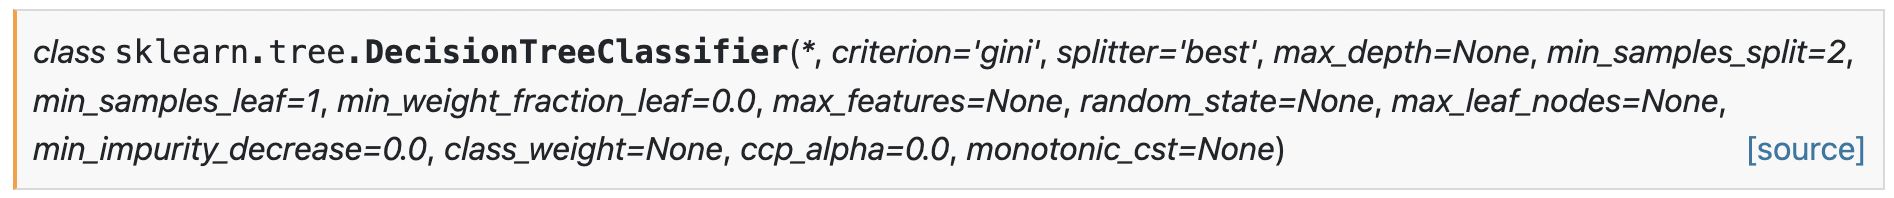

* criterion: 분할의 품질을 측정하는 기능. gini, entropy 등 사용 가능. 
* max_depth: 트리의 최대 깊이. None이면 모든 리프가 순수해질 때까지 노드 확장.
* min_samples_leaf: 리프 노드에 있어야하는 최소 샘플 수. 

In [114]:
# 특성 중요도 조회
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02159409, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03226776, 0.79120523, 0.04022023, 0.        ,
       0.        , 0.        , 0.11471269, 0.        , 0.        ])

* 특성 중요도: 해당 feature 덕분에 얼마나 분기가 잘 되었는지.(=불순도가 감소했는지.)

<Axes: >

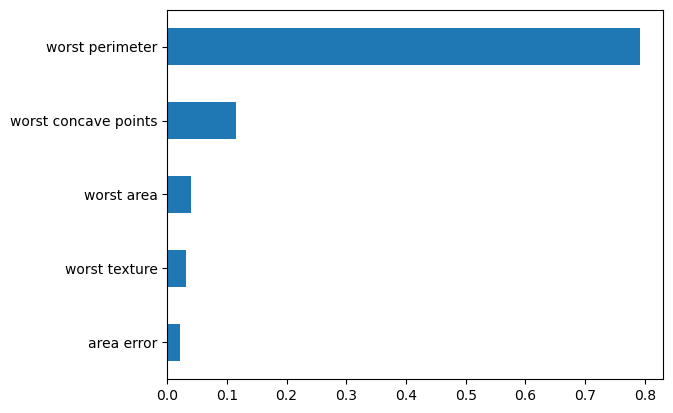

In [116]:
# 특성 중요도 시각화
fi = pd.Series(model.feature_importances_, index=model.feature_names_in_)
fi[fi != 0].sort_values().plot(kind='barh')

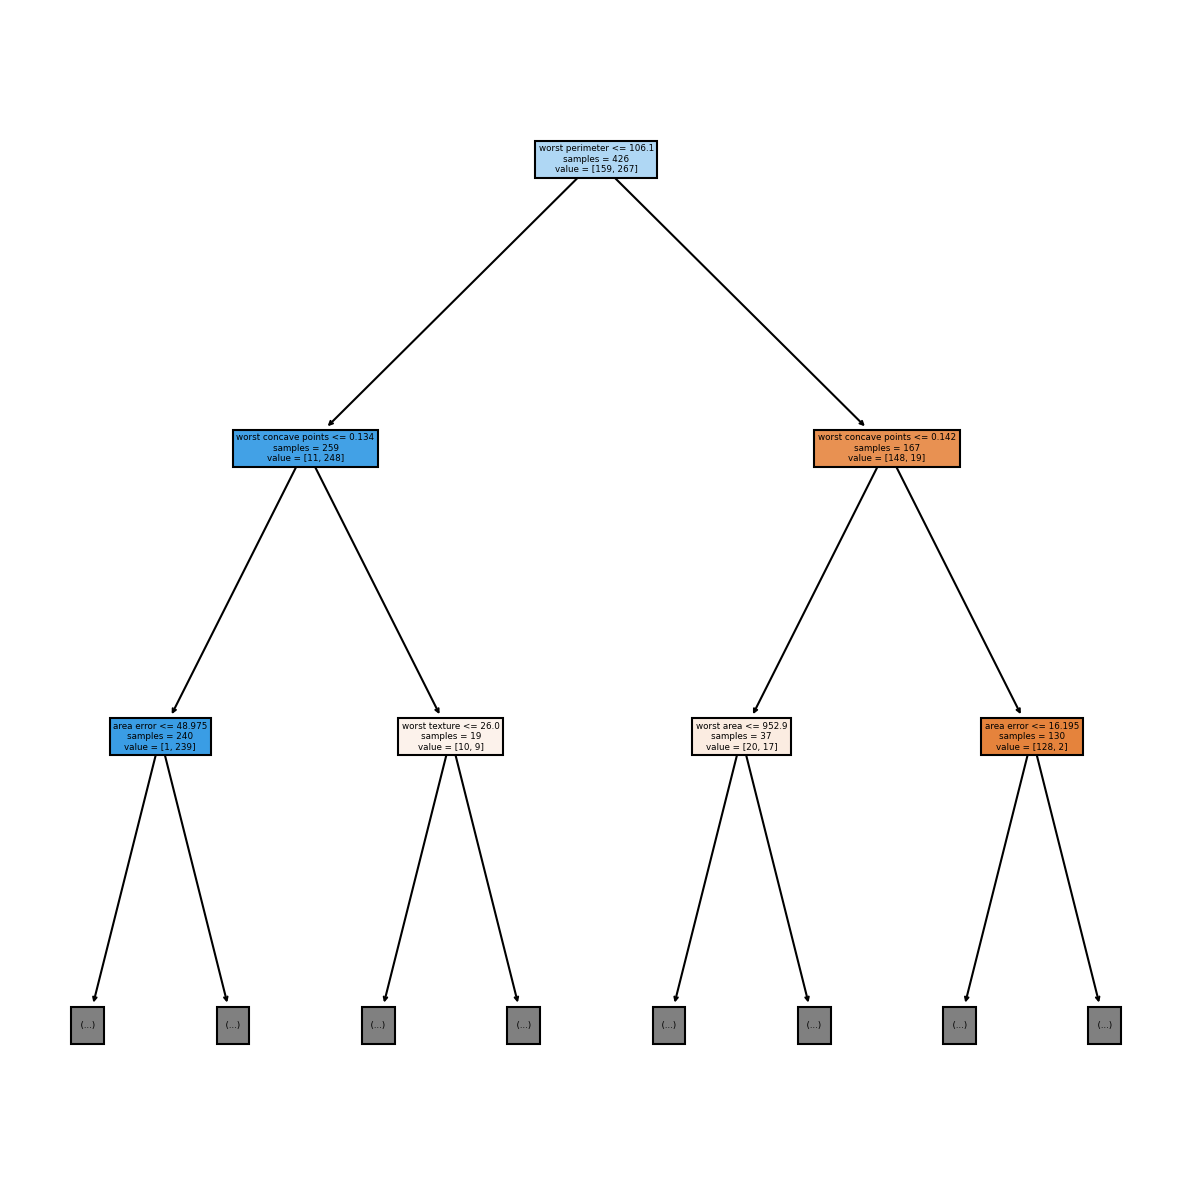

In [132]:
# plot_tree 함수를 이용하여 그래프를 시각화합니다.
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10), dpi=150)
plot_tree(model, max_depth=2,feature_names=df.columns.to_list(), impurity=False, filled=True)
plt.show()

## 랜덤 포레스트

### 앙상블
- 여러 머신 러닝 모델을 결합해서 더 강력한 모델을 만드는 기법
    - 여러 명의 전문가의 의견을 종합해서 예측하는 경우와 유사(집단지성)

In [6]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 

In [7]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target']=data['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
# 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
Y # 범주형 > 분류 모델 사용

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [10]:
# 학습용과 평가용으로 데이터 분할
 # 층화 분리 적용
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=0)

#### Bagging(배깅, Bootstrap Aggregating)
    - 같은 알고리즘을 결합, 서로 다른 훈련 데이터로 학습
    - 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습 시킨 결과를 집계(Aggregation)

In [11]:
# RandomForest 분류 모델 생성
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [12]:
# 모델 학습
rfc.fit(x_train, y_train) # 학습용 데이터만 사용

RandomForestClassifier()

In [13]:
# 모델 평가 (정확도)
print('학습 데이터 성능 :', rfc.score(x_train, y_train))
print('평가 데이터 성능 :', rfc.score(x_test, y_test))

학습 데이터 성능 : 1.0
평가 데이터 성능 : 0.951048951048951


In [14]:
# 모델 예측
p_test = rfc.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [15]:
# classification_report 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.96      0.97      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [16]:
# 분류기 개수 증가
rfc = RandomForestClassifier(n_estimators=1000)

In [17]:
# 모델 학습
rfc.fit(x_train, y_train) # 학습용 데이터만 사용

RandomForestClassifier(n_estimators=1000)

In [18]:
# 모델 평가 (정확도)
print('학습 데이터 성능 :', rfc.score(x_train, y_train))
print('평가 데이터 성능 :', rfc.score(x_test, y_test))

학습 데이터 성능 : 1.0
평가 데이터 성능 : 0.9440559440559441


#### Boosting(부스팅)
    - 여러 모델이 순차적으로 학습
    - 이전 모델의 결과에 따라 다음 모델에 가중치 부여

In [19]:
# GradientBoosting 분류 모델 생성
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [20]:
# 모델 학습
gbc.fit(x_train, y_train) # 학습용 데이터만 사용

GradientBoostingClassifier()

In [21]:
# 모델 평가 (정확도)
print('학습 데이터 성능 :', gbc.score(x_train, y_train))
print('평가 데이터 성능 :', gbc.score(x_test, y_test))

학습 데이터 성능 : 1.0
평가 데이터 성능 : 0.958041958041958


In [22]:
# 모델 예측
p_test = rfc.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [23]:
# classification_report 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.96      0.96      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



#### XGboost
  - scikit-learn API 제공 (https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

In [24]:
# conda install -c anaconda py-xgboost # 그냥 xgboost 설치했을 때 오류 날 경우!
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

In [25]:
# XGBoosting 분류 모델 생성
xgbc = xgb.XGBClassifier()

In [26]:
# 모델 학습
xgbc.fit(x_train, y_train) # 학습용 데이터만 사용

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
# 모델 평가 (정확도)
print('학습 데이터 성능 :', xgbc.score(x_train, y_train))
print('평가 데이터 성능 :', xgbc.score(x_test, y_test))

학습 데이터 성능 : 1.0
평가 데이터 성능 : 0.958041958041958
